In [9]:
!python -V

Python 3.9.12


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [49]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

In [50]:
#Q1
column_count = len(df.columns)
column_count

19

In [51]:
#Q2
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60


In [52]:
df.duration.std()

42.594351241920904

In [53]:
df.duration.mean()

15.668995167332046

In [54]:
# df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
# df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
# df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
# df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [55]:
df.duration.mean()

15.668995167332046

In [56]:
#Q3

In [57]:
len(df[(df.duration >= 1) & (df.duration <= 60)]) / len(df) * 100

98.1220282212598

In [21]:
#Q4

In [22]:
categorical = ['PULocationID','DOLocationID']
numerical =  ['trip_distance']

In [23]:
df[categorical] = df[categorical].astype(str)

In [24]:
train_dict = df[categorical].to_dict(orient='records')

In [25]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)


In [26]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [27]:
#Q5

In [28]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.649261027826866


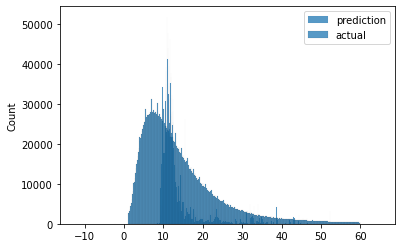

In [29]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend();

In [30]:
#Q6

In [26]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [35]:
df_val = read_data('./data/yellow_tripdata_2023-02.parquet')

In [36]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [37]:
dv = DictVectorizer()
X_val = dv.fit_transform(val_dicts)


In [38]:
y_val = df_val.duration.values

In [39]:
lr = LinearRegression()
lr.fit(X_val, y_val)
y_pred = lr.predict(X_val)

In [40]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE: 7.778947591715419


In [41]:
#td = df.duration.iloc[0]
#td.total_seconds()